In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split 
from statsmodels.tsa.ar_model import AR
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
UScases= pd.read_excel('CoronaUSCasesTransposed.xlsx')
USDeaths= pd.read_excel('CoronaUSDeathsTransposed.xlsx')
pd.set_option('display.max_columns', None)
UScases.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Name,Value
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/22/20,0
1,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/23/20,0
2,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/24/20,0
3,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/25/20,0
4,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/26/20,0
5,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/27/20,0
6,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/28/20,0
7,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/29/20,0
8,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/30/20,0
9,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/31/20,0


In [0]:
GlobalDeaths= pd.read_excel('CoronaGlobalDeathsTransposed (1).xlsx')
GlobalCases= pd.read_excel('CoronaGlobalTransposed.xlsx')

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[ 7.58526303e+01  8.71178553e+01  8.28329112e+01 ... -2.83670297e+05
 -2.84023439e+05 -2.84376872e+05]
1041504.1122155734


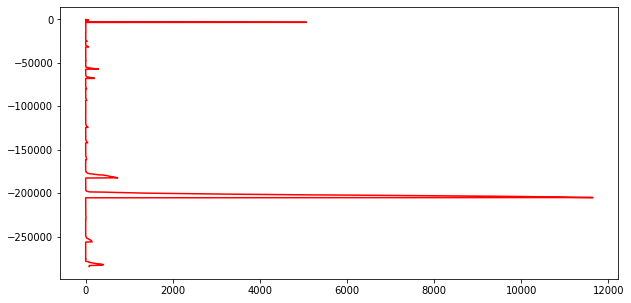

In [8]:

dict_of_sources = dict(iter(UScases.groupby('Province_State')))
michiganData=UScases.loc[UScases['Province_State'] == 'Michigan']
ActualData= michiganData['Value'].values.astype(float)

NumberOfElements = len(ActualData)
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]
#model = ARIMA(TestData, order=(1, 1, 0))
model = SARIMAX(ActualData, trend='c', order=(5,3,2), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()
prediction = model_fit.forecast(len(TestData))
plt.figure(figsize=(10,5))
plt.plot(TestData,prediction, color='red')
MSEArima= (sum(prediction[0]-TestData)**2)/len(TestData)

print(prediction)
print(MSEArima)

In [10]:
print(MSEArima)

1041504.1122155734


In [11]:
import csv 
with open('USPredictionsV6.csv', 'w', newline='') as file:
    dict_of_sources = dict(iter(UScases.groupby('Combined_Key')))
    sumMSE= 0
    for x, y in dict_of_sources.items():
        ActualData= y['Value'].values.astype(float)
        Lat= y['Lat'].values.astype(float)
        Long= y['Long_'].values.astype(float)
        singular= sum(ActualData)
        if(singular>2) :
            NumberOfElements = len(ActualData)
            TrainingSize = int(NumberOfElements * 0.7)
            TrainingData = ActualData[0:TrainingSize]
            TestData = ActualData[TrainingSize:NumberOfElements]
            #model = ARIMA(TestData, order=(1, 1, 0))
            model = SARIMAX(ActualData, trend='c', order=(2,2,1), enforce_stationarity=False, enforce_invertibility=False)
            model_fitStates = model.fit()
            predictionStates = model_fitStates.forecast(14)
            #plt.figure(figsize=(10,5))
            #plt.plot(TestData,predictionStates, color='red')
            #MSEArima= (sum(predictionStates[0]-TestData)**2)/len(TestData)
            
            #print(prediction)
            #print(MSEArima,x)
            writer = csv.writer(file,delimiter=',')
            writer.writerow([x,Lat[0],Long[0],predictionStates[13]])

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

In [17]:
with open('WorldPredictionsV4.csv', 'w', newline='') as file:
    dict_of_sources = dict(iter(GlobalCases.groupby('Country/Region')))
    sumMSE=0            
    for x, y in dict_of_sources.items():
        ActualData= y['Value'].values.astype(float)
        Lat= y['Lat'].values.astype(float)
        Long= y['Long'].values.astype(float)
        singular= sum(ActualData)
        if(singular>2) :
            NumberOfElements = len(ActualData)
            TrainingSize = int(NumberOfElements * 0.7)
            TrainingData = ActualData[0:TrainingSize]
            TestData = ActualData[TrainingSize:NumberOfElements]
            #model = ARIMA(TestData, order=(1, 1, 0))
            model = SARIMAX(ActualData, trend='c', order=(2,2,1), enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit()
            prediction = model_fit.forecast(14)
            #plt.figure(figsize=(10,5))
            #plt.plot(TestData,prediction, color='red')
            #MSEArima= (sum(prediction[0]-TestData)**2)/len(TestData)
            #sumMSE= sumMSE+MSEArima
            #print(prediction)
            #print(MSEArima,x)
            writer = csv.writer(file,delimiter=',')
            writer.writerow([x,Lat[0],Long[0],prediction[13]]

SyntaxError: ignored

In [13]:
with open('USPredictions.csv', 'w', newline='') as file:
    writer = csv.writer(file,delimiter='\t')
    writer.writerow(["Source ID: ",x,"MSE: ",MSE,"Number of y values:",len(y)])

NameError: ignored

In [15]:
WorldAgg= pd.read_csv('https://raw.githubusercontent.com/WorldCapital/COVID19-Project/master/TimeSeriesV2/worldAggregatedCases.csv')
import csv 
with open('WorldNewPredictionsV6667.csv', 'w', newline='') as file:
    ActualData= WorldAgg['Sum_total_cases'].values.astype(float)
    singular= sum(ActualData)
    if(singular>2) :
        NumberOfElements = len(ActualData)
        TrainingSize = int(NumberOfElements * 0.7)
        TrainingData = ActualData[0:TrainingSize]
        TestData = ActualData[TrainingSize:NumberOfElements]
        #model = ARIMA(TestData, order=(1, 1, 0))
        model = SARIMAX(ActualData, trend='c', order=(1,1,0), enforce_stationarity=False, enforce_invertibility=False)
        model_fitStates = model.fit()
        predictionStates = model_fitStates.forecast(14)
        #plt.figure(figsize=(10,5))
        #plt.plot(TestData,predictionStates, color='red')
        #MSEArima= (sum(predictionStates[0]-TestData)**2)/len(TestData)
        print(model_fitStates.summary())
        
        forecastPred = model_fitStates.predict(14)
        print(predictionStates)
        #print(MSEArima)
        writer = csv.writer(file,delimiter=',')
        writer.writerow(predictionStates)

HTTPError: ignored

In [0]:

newCountryData.head(10)